##  PROJECT SUMMARY

This project analyzes sentiment patterns in social media data using Twitter posts related to major brands and games. The goal is to understand public opinion by:

- Cleaning and preprocessing tweet text
- Visualizing overall sentiment distribution
- Generating WordClouds for each sentiment
- Analyzing sentiment per brand
- Identifying top 10 brands with most positive and most negative mentions




In [31]:
# import Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Mayuri\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
# Define column names
cols = ['id', 'entity', 'sentiment', 'text']

# Load both datasets
train_df = pd.read_csv('twitter_training.csv', names=cols, header=None)
val_df = pd.read_csv('twitter_validation.csv', names=cols, header=None)

# Combine into one DataFrame
df = pd.concat([train_df, val_df], ignore_index=True)
df.head()


,id,entity,sentiment,text
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
#Text Preprocessing: Clean tweet text by removing URLs, mentions, hashtags, special characters, and converting to lowercase

def clean_text(text):
    text = re.sub(r"http\S+", "", text)
    text = re.sub(r"@\w+", "", text)
    text = re.sub(r"#", "", text)
    text = re.sub(r"[^A-Za-z\s]", "", text)
    text = text.lower()
    return text

df['cleaned_text'] = df['text'].astype(str).apply(clean_text)
df[['sentiment', 'cleaned_text']].head()


,sentiment,cleaned_text
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,i am coming to the borders and i will kill you...
2,Positive,im getting on borderlands and i will kill you all
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands and i will murder y...


In [7]:
df['sentiment'].value_counts()


sentiment
Negative      22808
Positive      21109
Neutral       18603
Irrelevant    13162
Name: count, dtype: int64

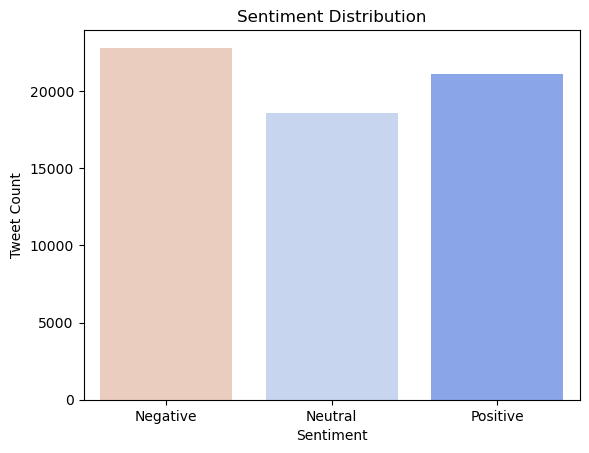

In [10]:
#Visualizing Overall Sentiment Distribution in Tweets

sns.countplot(x='sentiment', hue='sentiment', data=df, palette='coolwarm', legend=False,
              order=['Negative', 'Neutral', 'Positive'])

plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Tweet Count")
plt.show()


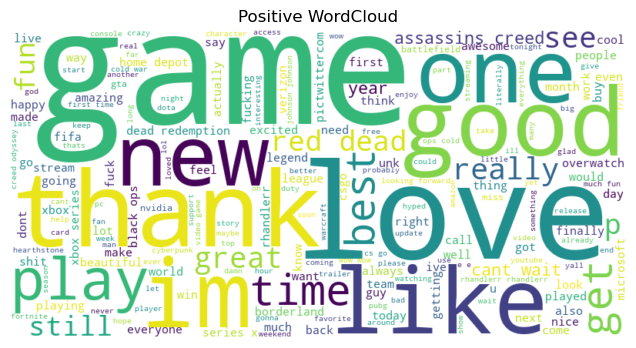

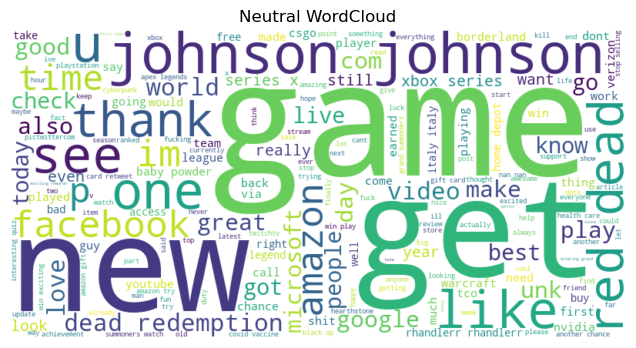

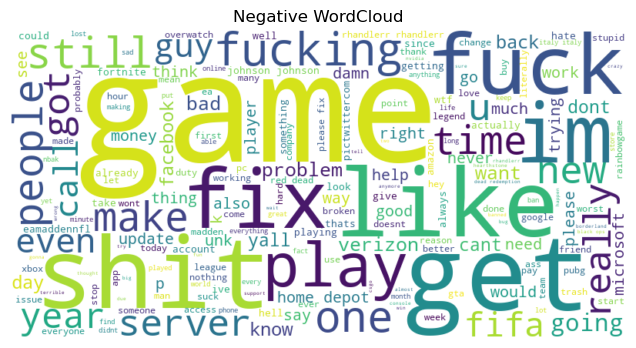

In [17]:
#  Generate and Display WordClouds for Each Sentiment Category

for label in ['Positive', 'Neutral', 'Negative']:
    text = ' '.join(df[df['sentiment'] == label]['cleaned_text'])
    wordcloud = WordCloud(width=800, height=400, background_color='white',
                          stopwords=set(stopwords.words('english'))).generate(text)
    
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"{label} WordCloud")
    plt.show()


In [18]:
!pip install wordcloud


Defaulting to user installation because normal site-packages is not writeable


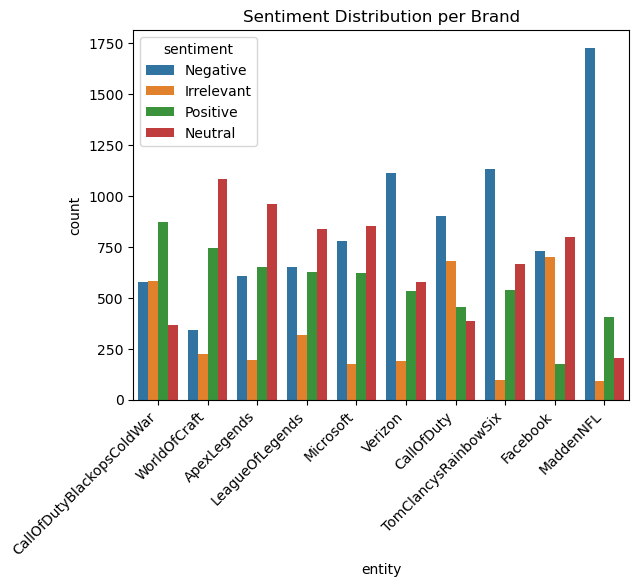

In [21]:
# Top brands/entities
top_entities = df['entity'].value_counts().nlargest(10).index

# Filter and plot
sns.countplot(data=df[df['entity'].isin(top_entities)], x='entity', hue='sentiment')
plt.title("Sentiment Distribution per Brand")
plt.xticks(rotation=45, ha='right')
plt.show()


In [23]:
#Group by entity and sentiment

brand_sentiment_counts = df.groupby(['entity', 'sentiment']).size().reset_index(name='count')
brand_sentiment_counts.head()


,entity,sentiment,count
0,Amazon,Irrelevant,195
1,Amazon,Negative,582
2,Amazon,Neutral,1254
3,Amazon,Positive,319
4,ApexLegends,Irrelevant,195


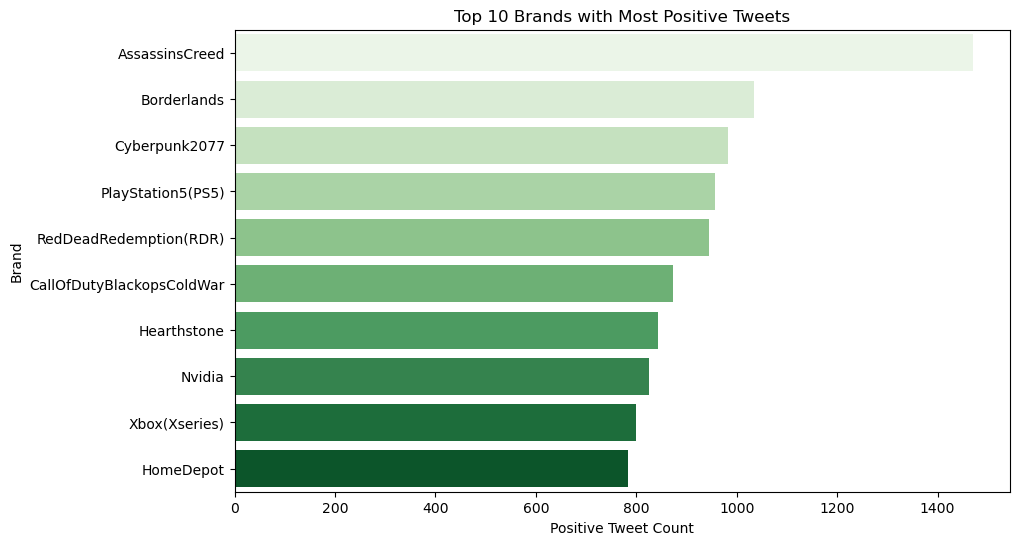

In [27]:
#Show Top Brands by Positive Sentiment

top_positive = brand_sentiment_counts[brand_sentiment_counts['sentiment'] == 'Positive']
top_positive = top_positive.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(data=top_positive, y='entity', x='count', hue='entity', palette='Greens', dodge=False, legend=False)
plt.title('Top 10 Brands with Most Positive Tweets')
plt.xlabel('Positive Tweet Count')
plt.ylabel('Brand')
plt.show()


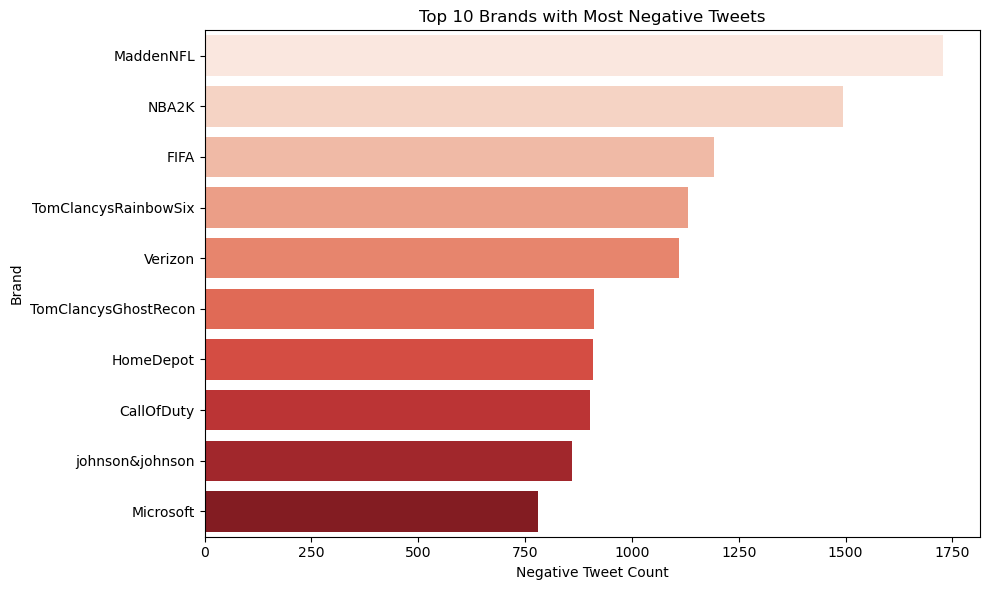

In [30]:
#Show Top Brands by Negative Sentiment

top_negative = brand_sentiment_counts[brand_sentiment_counts['sentiment'] == 'Negative']
top_negative = top_negative.sort_values(by='count', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_negative, y='entity', x='count', hue='entity', palette='Reds', dodge=False, legend=False)
plt.title('Top 10 Brands with Most Negative Tweets')
plt.xlabel('Negative Tweet Count')
plt.ylabel('Brand')
plt.tight_layout()
plt.show()
